In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
from tqdm import tqdm
from matplotlib import pyplot as plt
%matplotlib inline
from ovejero import model_trainer, data_tools, bnn_inference

# Testing the Performance of Trained Models

__Author:__ Sebastian Wagner-Carena

__Created:__ 11/15/2019

__Last Run:__ 11/15/2019

__Goals:__ Inspect how the different bnn types and data augmentation strategies change the performance

## Diagonal Posterior - Normalizing Inputs

In [20]:
# First specify the config path
root_path = '/Users/sebwagner/Documents/Grad_School/Research/Phil/ovejero/'
config_path = root_path + 'configs/nn1.json'

# Check that the config has what you need
cfg = model_trainer.load_config(config_path)

def recursive_str_checker(cfg_dict):
    for key in cfg_dict:
        if isinstance(cfg_dict[key],str):
            cfg_dict[key] = cfg_dict[key].replace('/home/swagnercarena/ovejero/',root_path)
        if isinstance(cfg_dict[key],dict):
            recursive_str_checker(cfg_dict[key])
recursive_str_checker(cfg)

# The InferenceClass will do all the heavy lifting of preparing the model from the configuration file,
# initializing the validation dataset, and providing outputs correctly marginalized over the BNN uncertainties.
bnn_infer = bnn_inference.InferenceClass(cfg)

# Now we just have to ask the InferenceClass to spin up some samples from our BNN. The more samples, the more
# accurate our plots and metrics will be. The right value to use unfortunately requires a bit of trial and error.
# 100 is a good starting point though.
num_samples = 1000
save_path_nn1 = root_path + 'validation_results/nn1_samps/'
bnn_infer.gen_samples(num_samples,save_path_nn1)

Is model built: True
Loaded weights /Users/sebwagner/Documents/Grad_School/Research/Phil/ovejero/models/nn1.h5
Loading samples from /Users/sebwagner/Documents/Grad_School/Research/Phil/ovejero/validation_results/nn1_samps/


In [21]:
bnn_infer.report_stats()

Parameter, RMSE, Median Abs Error, Median Std
external_shear_g1 0.0306147867899556 0.011068889143496147 0.020763149371965064
external_shear_g2 0.027973523114657388 0.010419096586619672 0.021898408150768305
lens_mass_center_x 0.016405634236661314 0.006866355151366275 0.02175734424041569
lens_mass_center_y 0.017109646606305578 0.007423969830759334 0.02175735664167202
lens_mass_e1 0.045036021269079816 0.017516797590796662 0.04598767523510498
lens_mass_e2 0.04299157352263884 0.017682747313124664 0.04312120514377554
lens_mass_gamma 0.06506408483026696 0.031827842189168454 0.051204249563627485
lens_mass_theta_E_log 0.02048070383164816 0.006762187363060905 0.02036393449245921


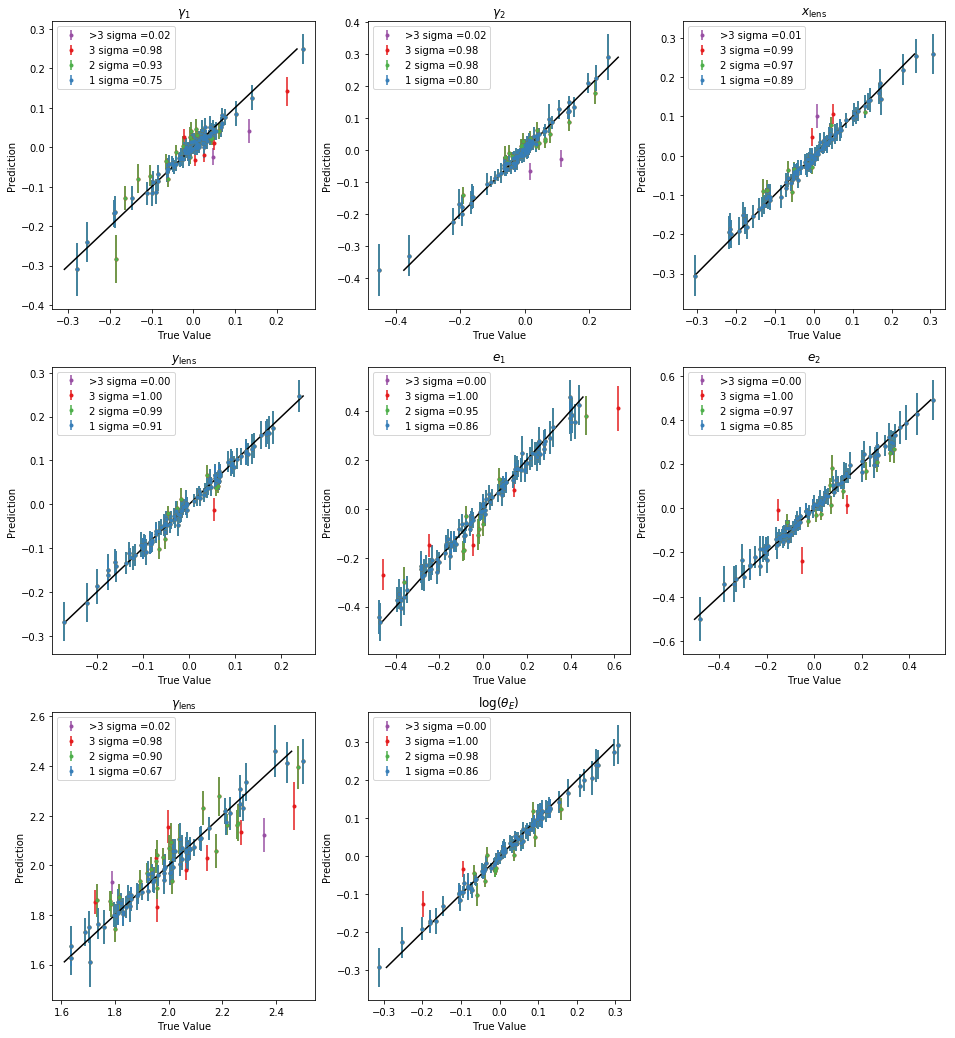

In [22]:
num_lenses = 100
bnn_infer.gen_coverage_plots(num_lenses=num_lenses)

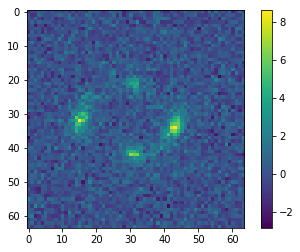

external_shear_g1 0.04034413
external_shear_g2 0.0074263155
lens_mass_center_x -0.11245069
lens_mass_center_y -0.0239592
lens_mass_e1 -0.3739343
lens_mass_e2 -0.03471752
lens_mass_gamma 2.0415375
lens_mass_theta_E_log 0.0097117


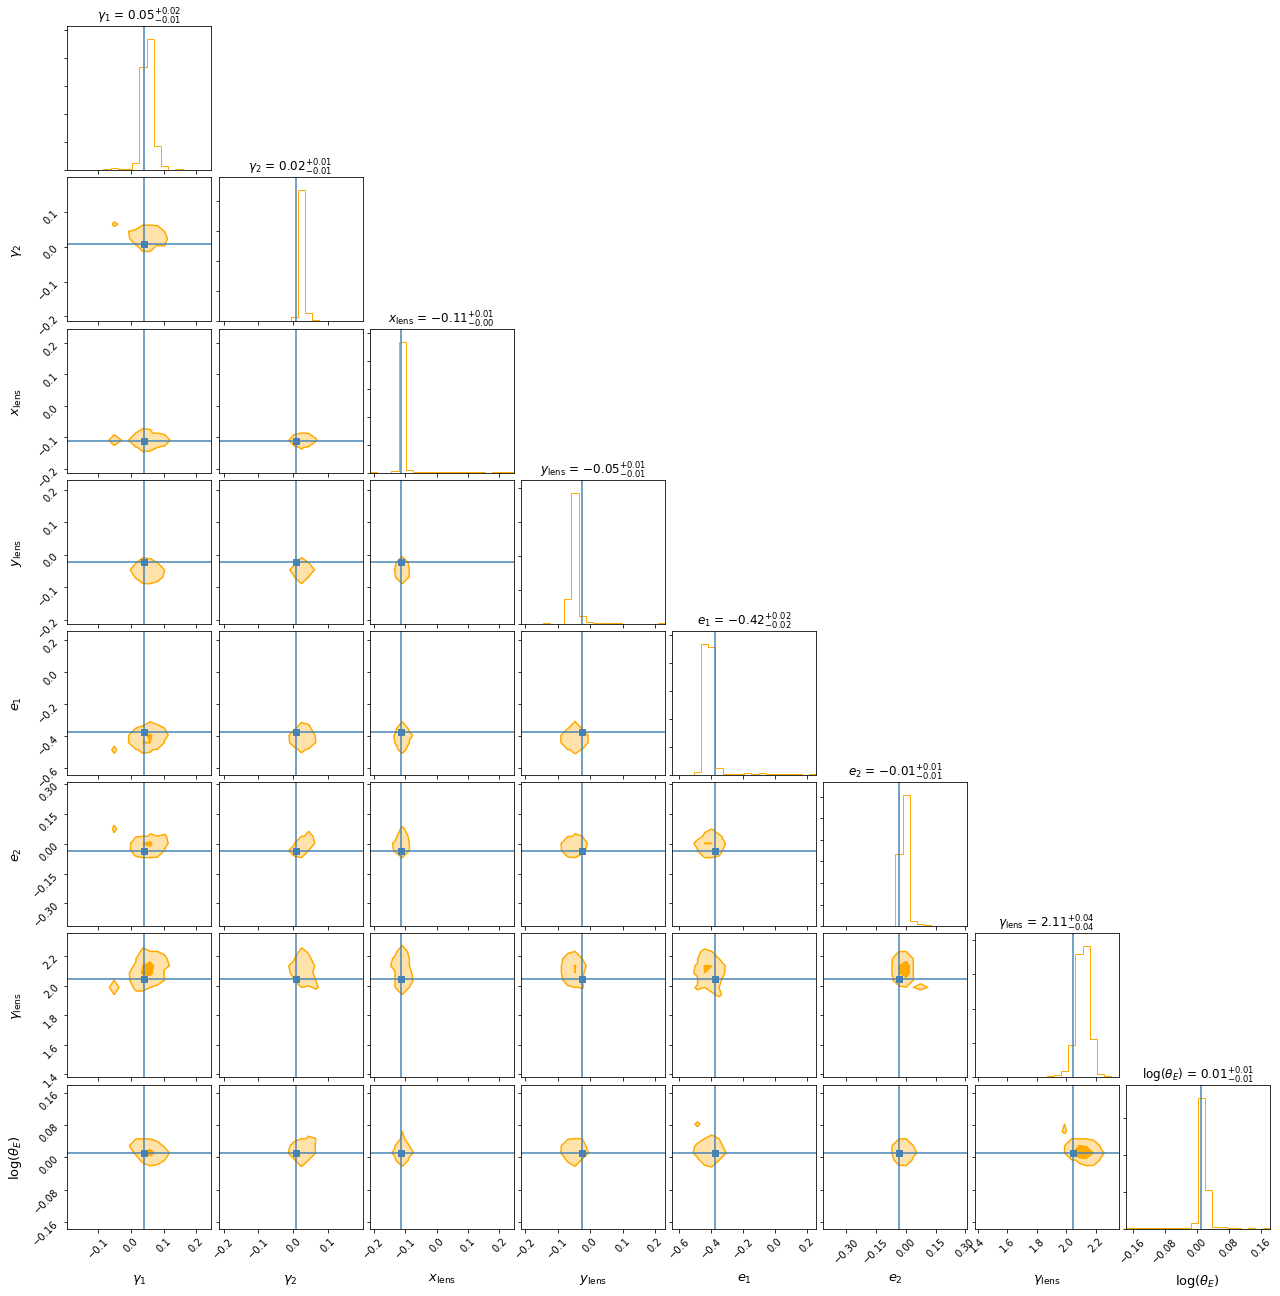

In [23]:
image_index = 8
bnn_infer.plot_posterior_contours(image_index)

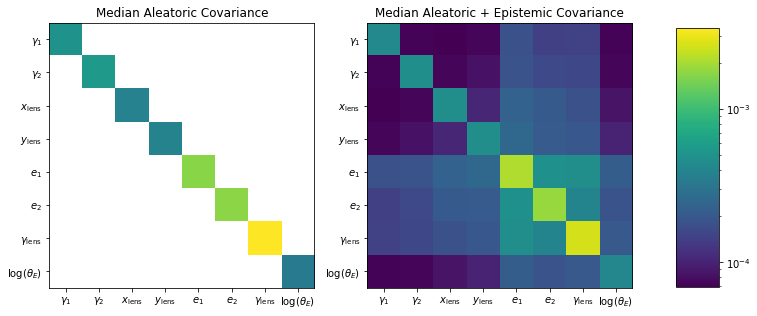

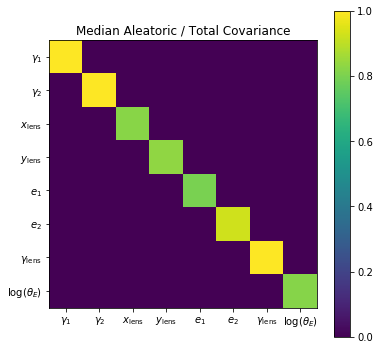

In [24]:
bnn_infer.comp_al_ep_unc(norm_diagonal=False)

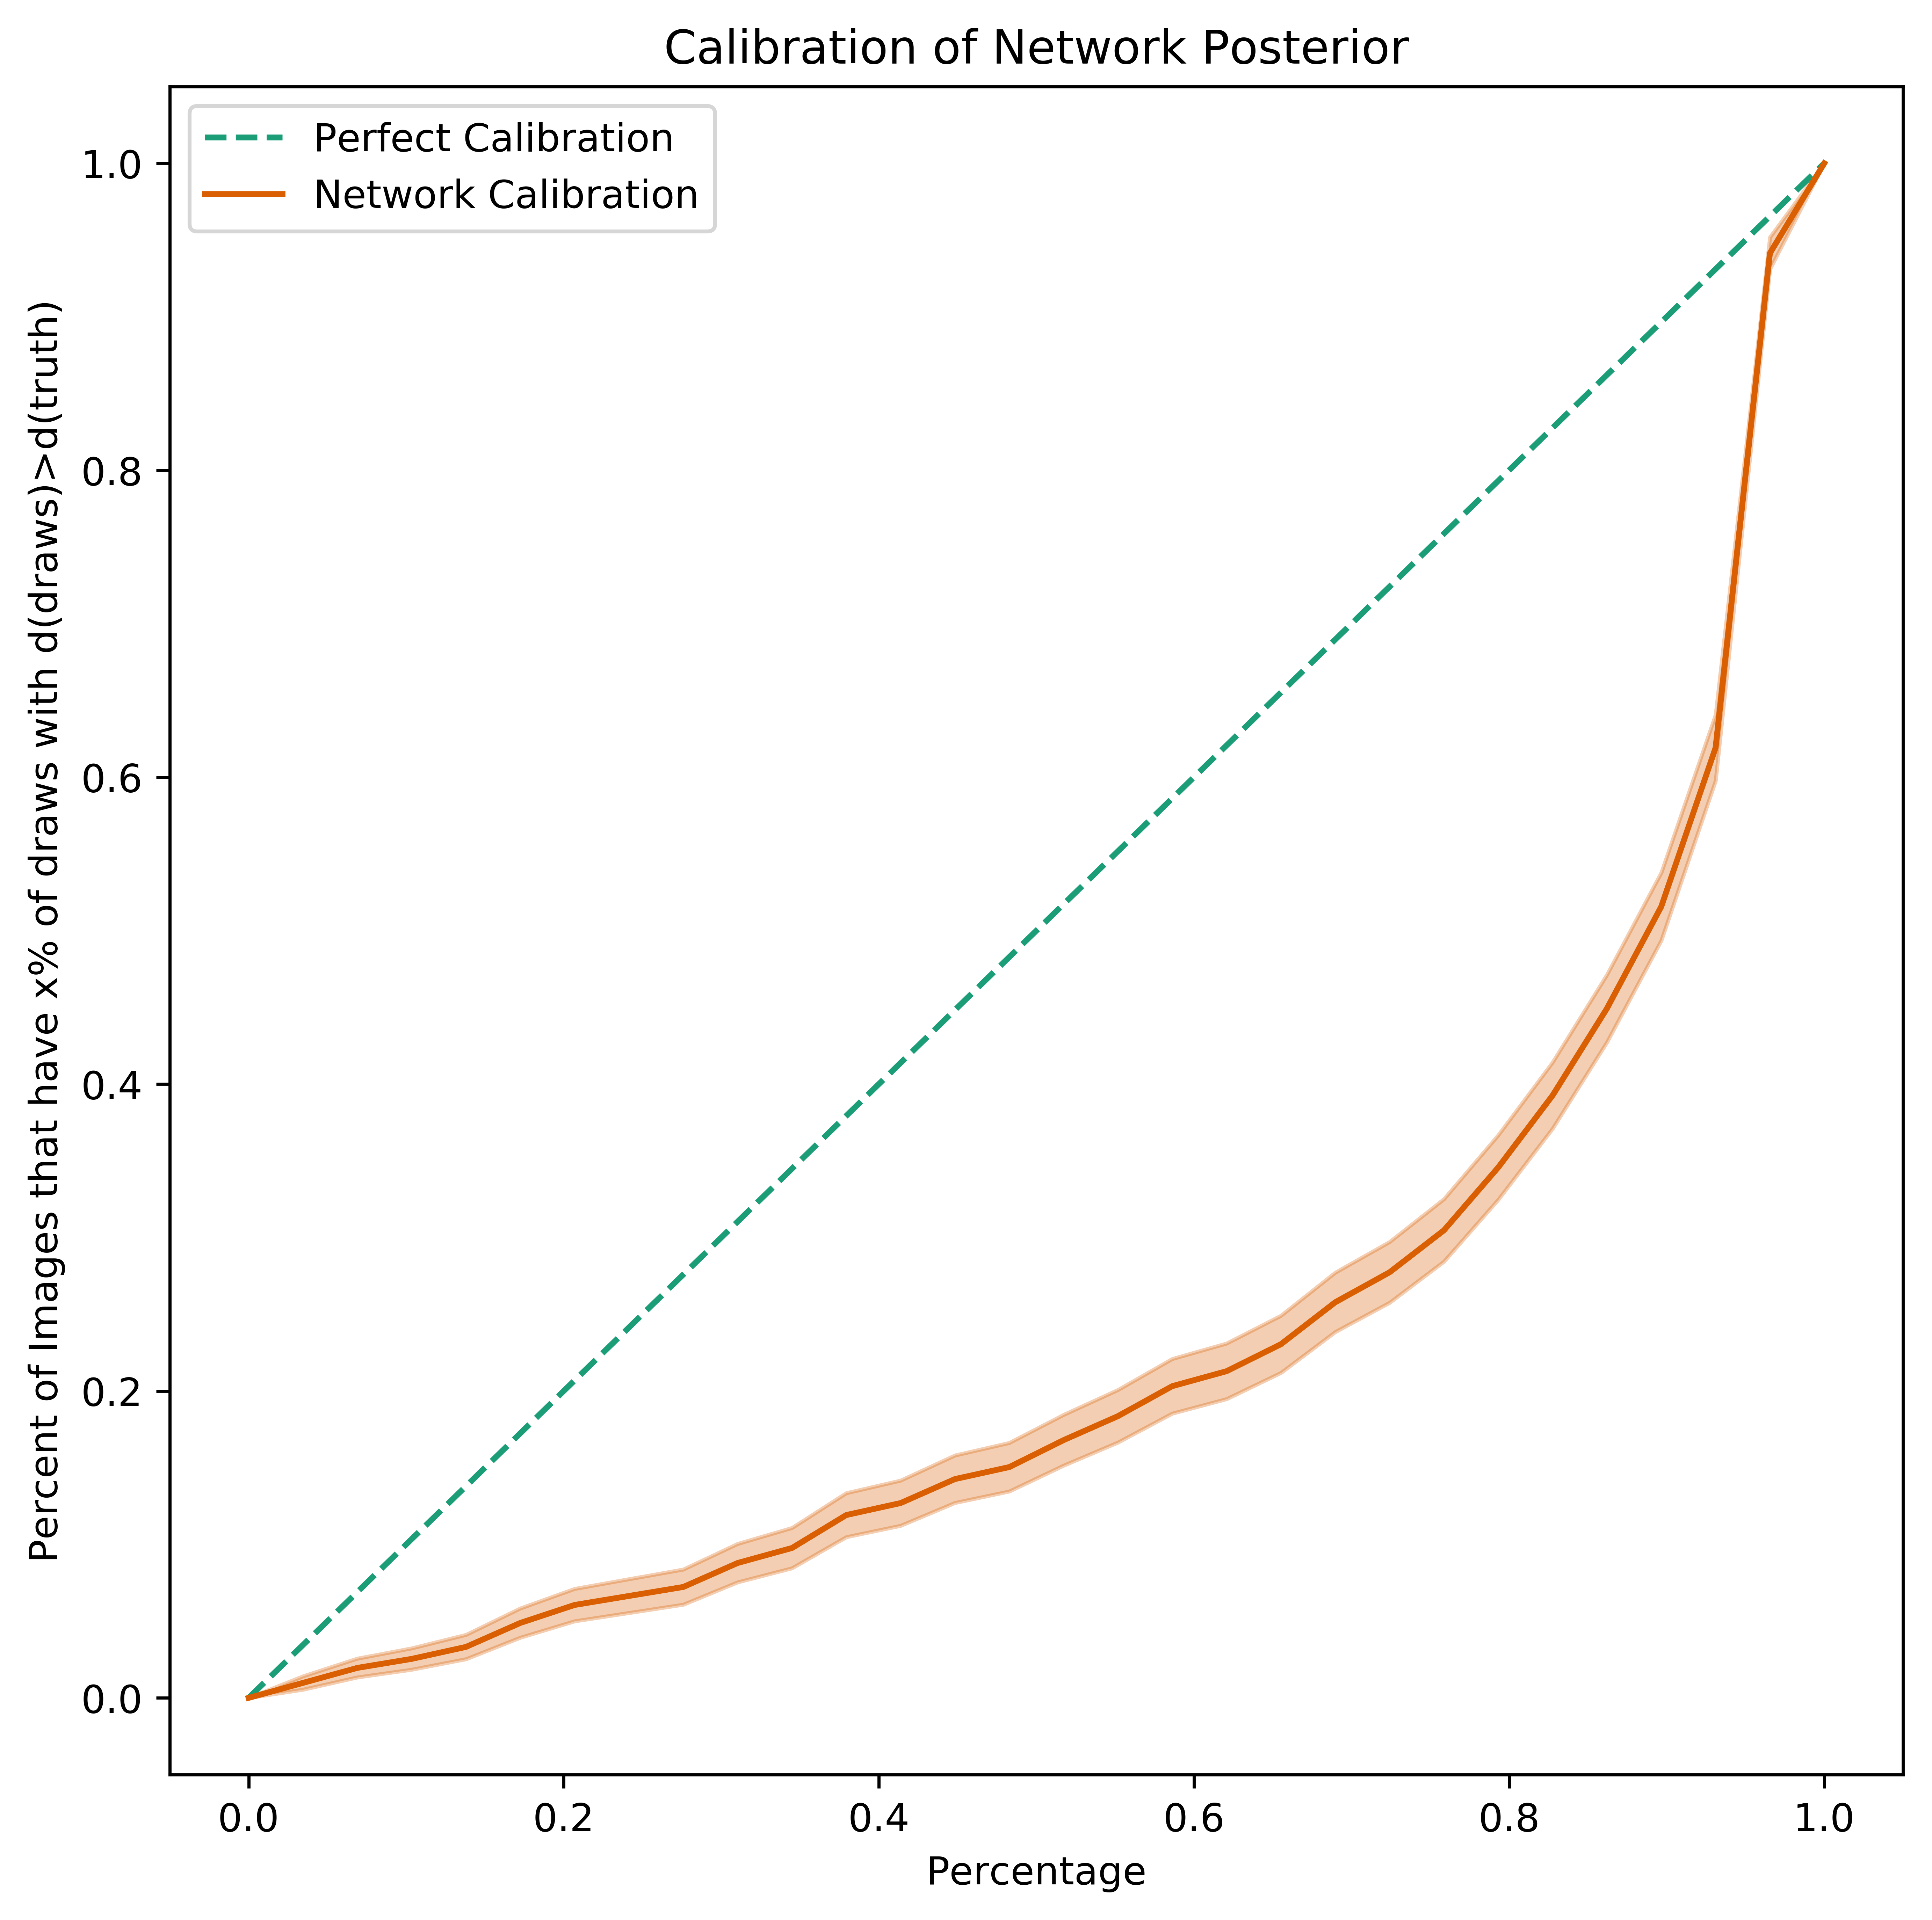

In [7]:
color_map = ['#1b9e77','#d95f02','#7570b3','#e7298a','#66a61e']
n_perc_points = 30
fig = bnn_infer.plot_calibration(color_map=color_map,n_perc_points=n_perc_points,show_plot=False)

## Diagonal High Regularizer

In [14]:
config_path = root_path + 'configs/nn1_hr.json'
cfg = model_trainer.load_config(config_path)
recursive_str_checker(cfg)
bnn_infer = bnn_inference.InferenceClass(cfg)
save_path_nn1_hr = root_path + 'validation_results/nn1_hr_samps/'
bnn_infer.gen_samples(num_samples,save_path_nn1_hr)

Is model built: True
No weights found. Saving new weights to /Users/sebwagner/Documents/Grad_School/Research/Phil/ovejero/models/nn1_hr.h5
Loading samples from /Users/sebwagner/Documents/Grad_School/Research/Phil/ovejero/validation_results/nn1_hr_samps/


In [15]:
bnn_infer.report_stats()

Parameter, RMSE, Median Abs Error, Median Std
external_shear_g1 0.027045702755902932 0.011440223839469472 0.015255073257135075
external_shear_g2 0.025774011365416294 0.012396921478096392 0.014087266885145056
lens_mass_center_x 0.018020027955324622 0.007242130033324079 0.015303736895792612
lens_mass_center_y 0.018751536530801527 0.005653354292783069 0.015708009146457445
lens_mass_e1 0.04890341366265774 0.018596860926604578 0.03235565130642726
lens_mass_e2 0.0377021693863715 0.016731397352832023 0.030730216634592997
lens_mass_gamma 0.07011449885358248 0.03944921805324708 0.03468912574493195
lens_mass_theta_E_log 0.026621577922973736 0.008436550410382486 0.015237907529068078


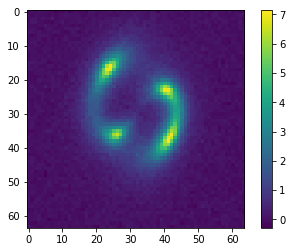

external_shear_g1 -0.03215128
external_shear_g2 -0.04939804
lens_mass_center_x 0.012505064
lens_mass_center_y -0.19954157
lens_mass_e1 -0.012371898
lens_mass_e2 -0.3264884
lens_mass_gamma 1.7376893
lens_mass_theta_E_log -0.010042509


W0317 13:51:21.265609 4430587328 corner.py:542] Too few points to create valid contours
W0317 13:51:21.331444 4430587328 corner.py:542] Too few points to create valid contours
W0317 13:51:21.474179 4430587328 corner.py:542] Too few points to create valid contours
W0317 13:51:21.543071 4430587328 corner.py:542] Too few points to create valid contours
W0317 13:51:21.589867 4430587328 corner.py:542] Too few points to create valid contours
W0317 13:51:21.630047 4430587328 corner.py:542] Too few points to create valid contours
W0317 13:51:21.682313 4430587328 corner.py:542] Too few points to create valid contours
W0317 13:51:21.783221 4430587328 corner.py:542] Too few points to create valid contours
W0317 13:51:21.849695 4430587328 corner.py:542] Too few points to create valid contours
W0317 13:51:21.944020 4430587328 corner.py:542] Too few points to create valid contours
W0317 13:51:21.999984 4430587328 corner.py:542] Too few points to create valid contours
W0317 13:51:22.117373 4430587328

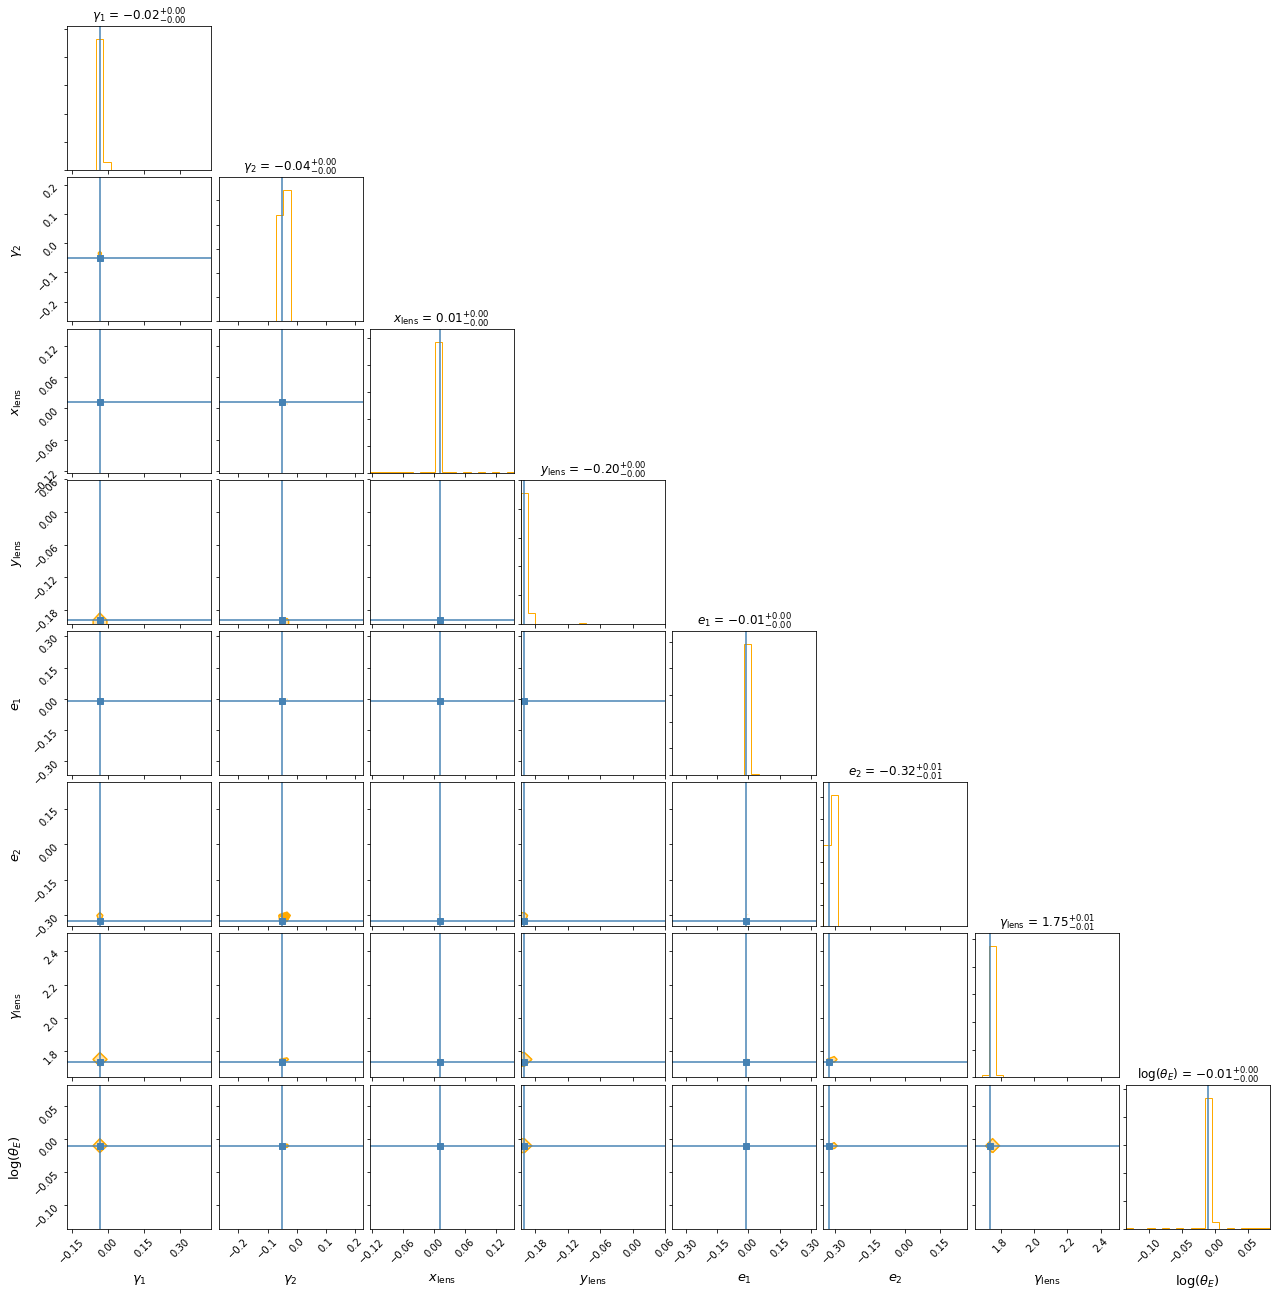

In [16]:
image_index = 8
bnn_infer.plot_posterior_contours(image_index)

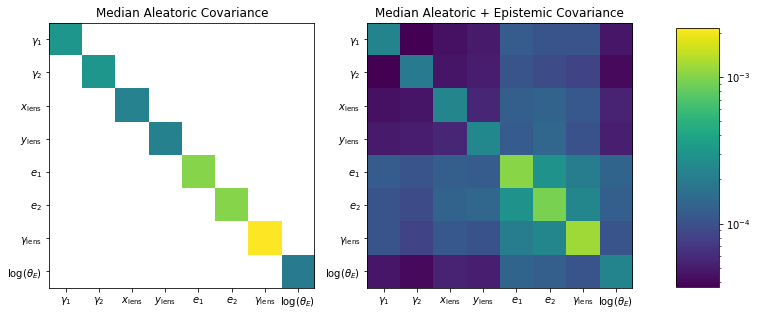

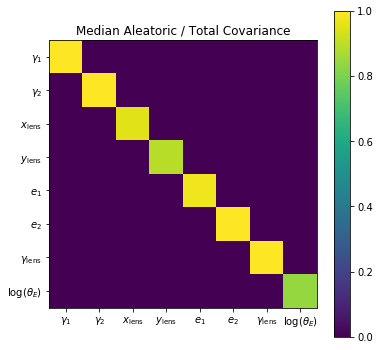

In [18]:
bnn_infer.comp_al_ep_unc(norm_diagonal=False)

## Diagonal Very High Regularizer

In [25]:
config_path = root_path + 'configs/nn1_hhr.json'
cfg = model_trainer.load_config(config_path)
recursive_str_checker(cfg)
bnn_infer = bnn_inference.InferenceClass(cfg)
save_path_nn1_hhr = root_path + 'validation_results/nn1_hhr_samps/'
bnn_infer.gen_samples(num_samples,save_path_nn1_hhr)

Is model built: True
No weights found. Saving new weights to /Users/sebwagner/Documents/Grad_School/Research/Phil/ovejero/models/nn1_hhr.h5
Loading samples from /Users/sebwagner/Documents/Grad_School/Research/Phil/ovejero/validation_results/nn1_hhr_samps/


In [26]:
bnn_infer.report_stats()

Parameter, RMSE, Median Abs Error, Median Std
external_shear_g1 0.1394829345820295 0.040621875956195166 0.04363640259871476
external_shear_g2 0.0838802017017517 0.03998682515383055 0.04495727960635951
lens_mass_center_x 0.08582533130827852 0.05928018652808616 0.09164208331228825
lens_mass_center_y 0.10159799401540283 0.06376009919602563 0.09234655030051878
lens_mass_e1 0.2001585063599767 0.13795091749439378 0.12467211368874365
lens_mass_e2 0.1661454891458387 0.1170976846803328 0.12424363328631005
lens_mass_gamma 0.1881046762844895 0.14204492340251018 0.18291227160617834
lens_mass_theta_E_log 0.07122000832401228 0.03500429333138513 0.03719741296094163


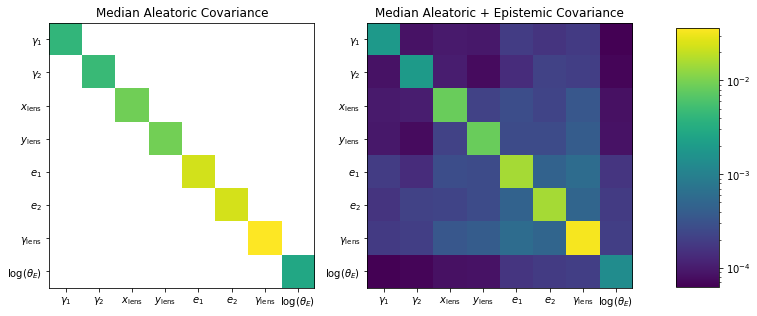

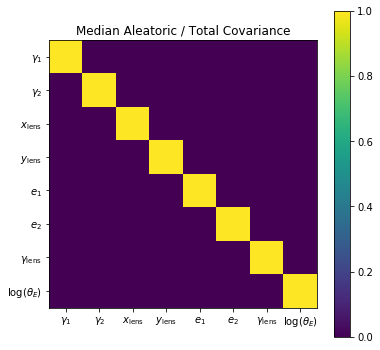

In [27]:
bnn_infer.comp_al_ep_unc(norm_diagonal=False)

## Comparison of Diagonals

Is model built: True
Loaded weights /Users/sebwagner/Documents/Grad_School/Research/Phil/ovejero/models/nn1.h5
Loading samples from /Users/sebwagner/Documents/Grad_School/Research/Phil/ovejero/validation_results/nn1_samps/
Is model built: True
No weights found. Saving new weights to /Users/sebwagner/Documents/Grad_School/Research/Phil/ovejero/models/nn1_hr.h5
Loading samples from /Users/sebwagner/Documents/Grad_School/Research/Phil/ovejero/validation_results/nn1_hr_samps/
Is model built: True
No weights found. Saving new weights to /Users/sebwagner/Documents/Grad_School/Research/Phil/ovejero/models/nn1_hhr.h5
Loading samples from /Users/sebwagner/Documents/Grad_School/Research/Phil/ovejero/validation_results/nn1_hhr_samps/


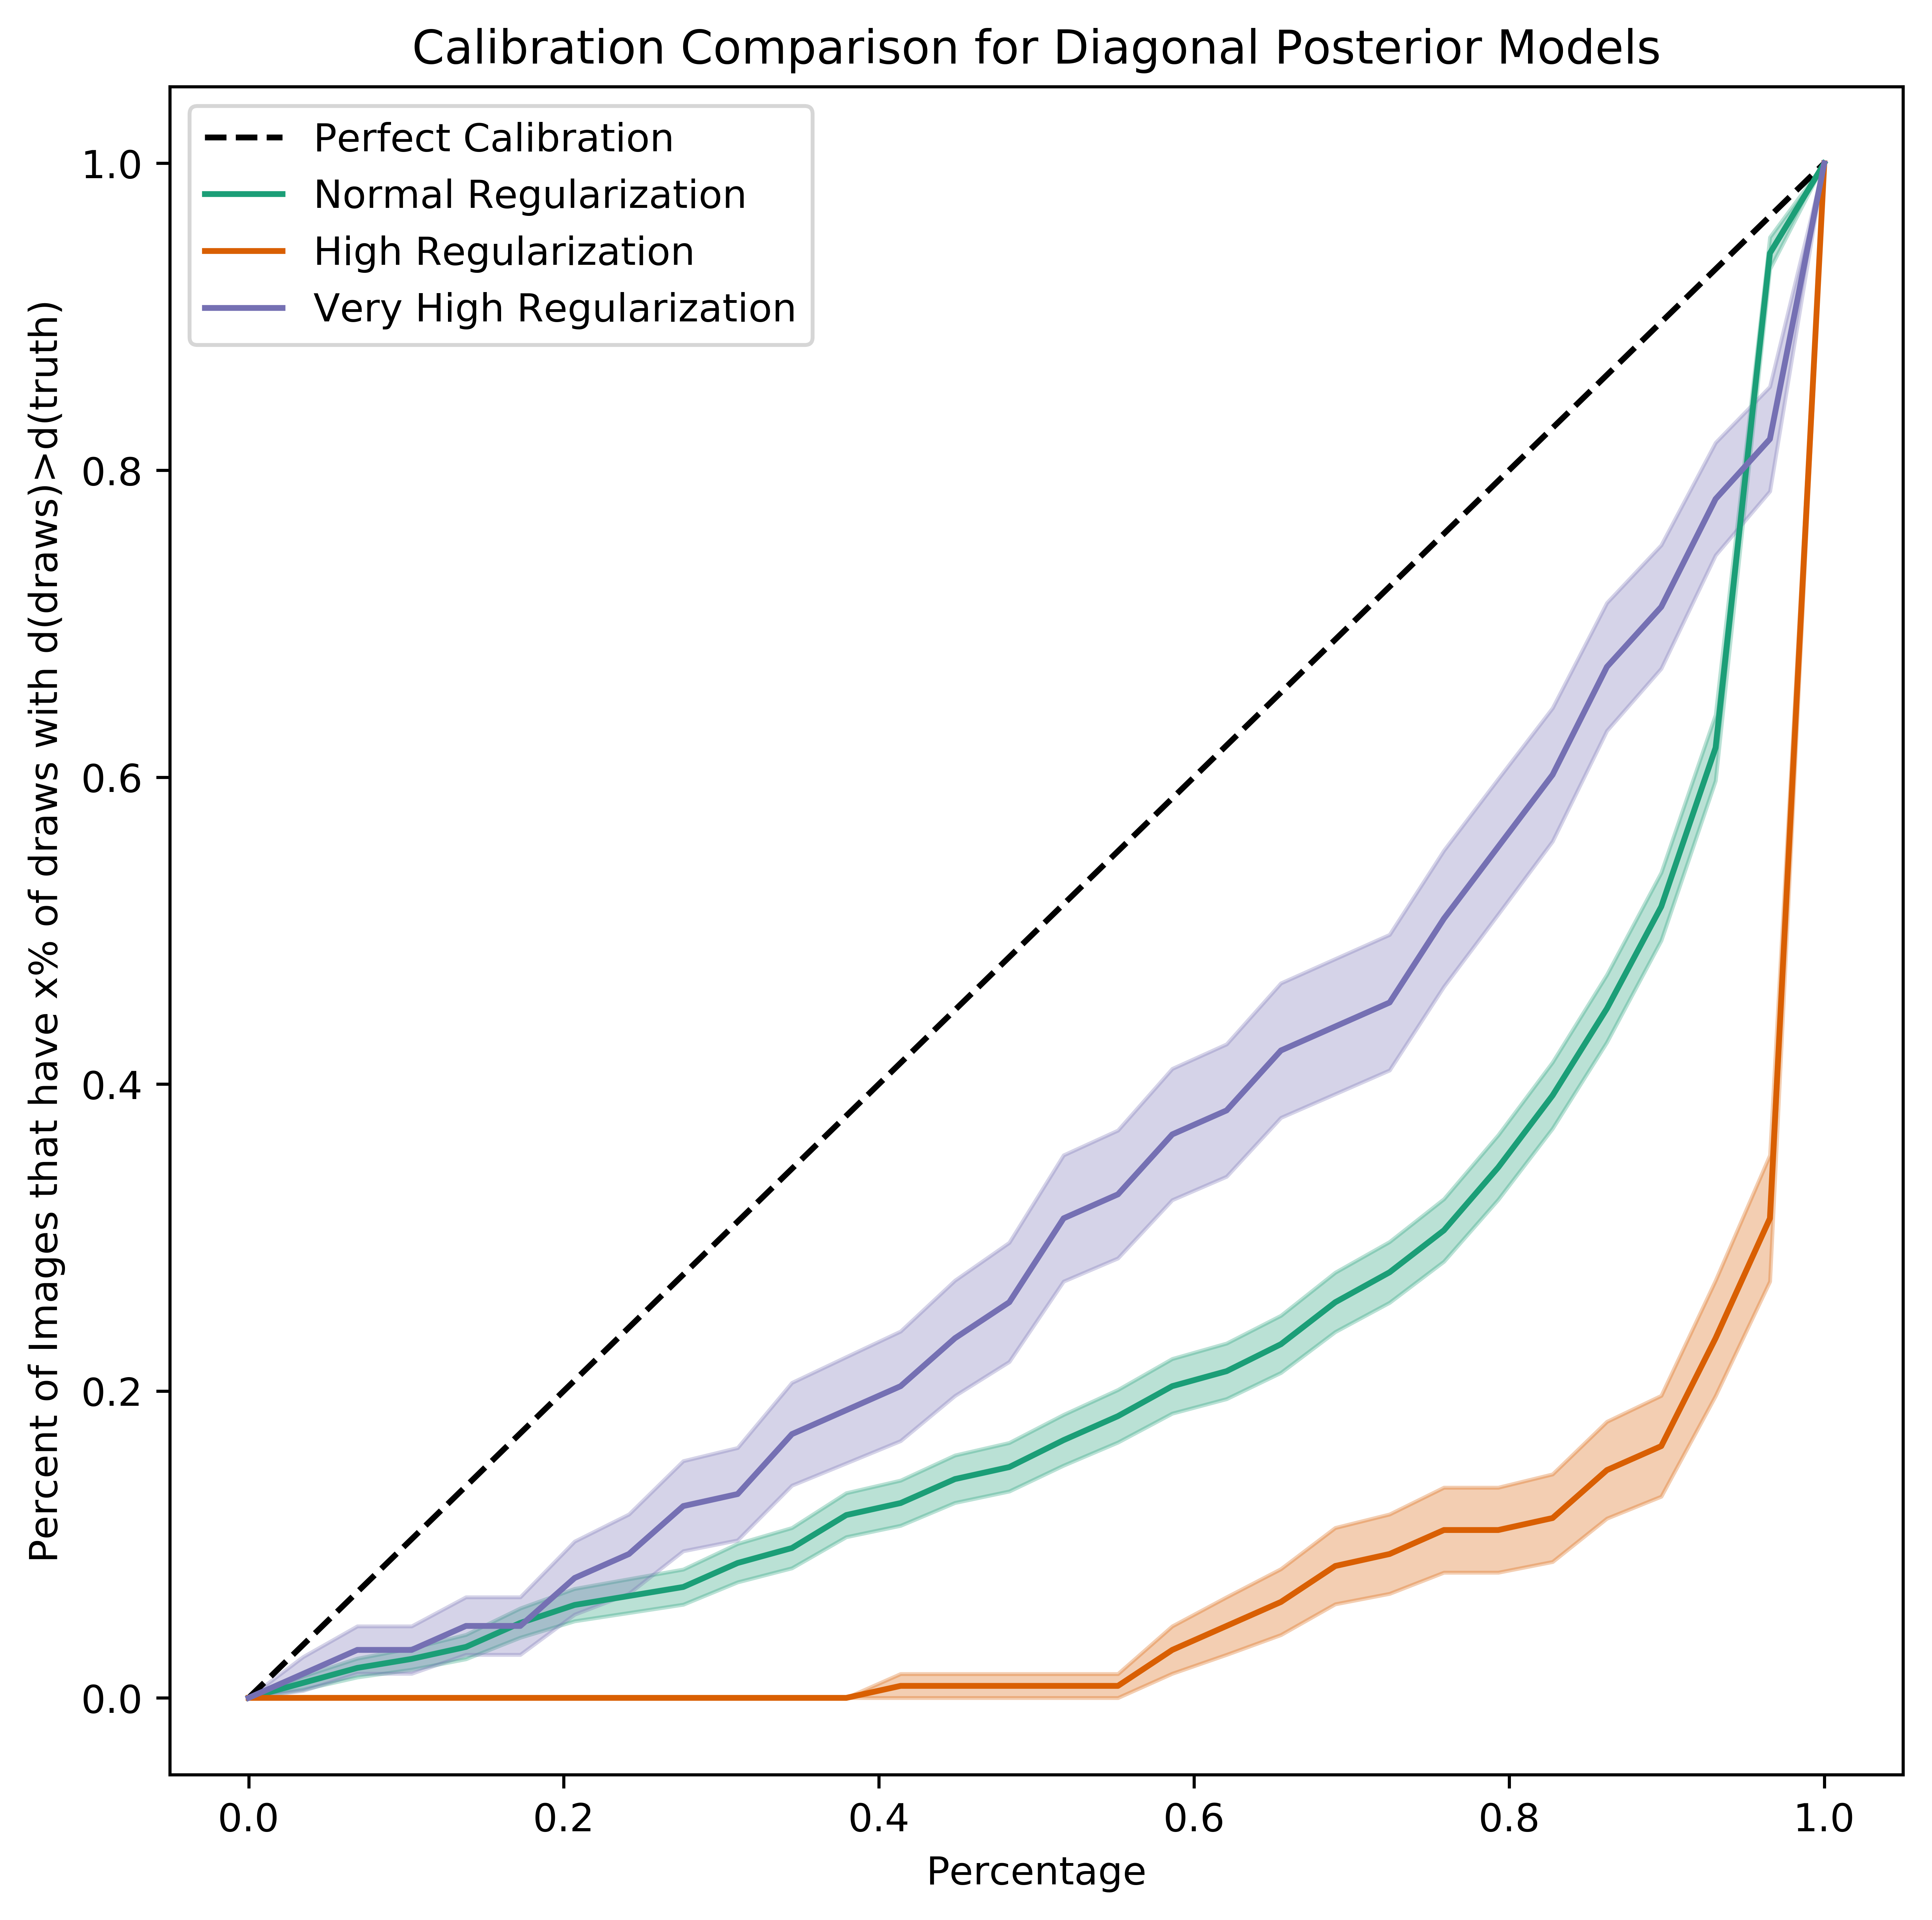

In [12]:
# NN1_LR
config_path = root_path + 'configs/nn1.json'
cfg = model_trainer.load_config(config_path)
recursive_str_checker(cfg)
bnn_infer = bnn_inference.InferenceClass(cfg)
bnn_infer.gen_samples(num_samples,save_path_nn1)
color_map = ['#000000','#1b9e77','#d95f02','#7570b3','#e7298a']
n_perc_points = 30
fig = bnn_infer.plot_calibration(color_map=color_map,n_perc_points=n_perc_points,show_plot=False)

# NN1_HR
config_path = root_path + 'configs/nn1_hr.json'
cfg = model_trainer.load_config(config_path)
recursive_str_checker(cfg)
bnn_infer = bnn_inference.InferenceClass(cfg)
bnn_infer.gen_samples(num_samples,save_path_nn1_hr)
fig = bnn_infer.plot_calibration(color_map=color_map[1:],n_perc_points=n_perc_points,figure=fig,show_plot=False)

# NN1_HHR
config_path = root_path + 'configs/nn1_hhr.json'
cfg = model_trainer.load_config(config_path)
recursive_str_checker(cfg)
bnn_infer = bnn_inference.InferenceClass(cfg)
bnn_infer.gen_samples(num_samples,save_path_nn1_hhr)
fig = bnn_infer.plot_calibration(color_map=color_map[2:],n_perc_points=n_perc_points,figure=fig,show_plot=True,
                                legend=['Perfect Calibration','Normal Regularization','High Regularization',
                                       'Very High Regularization'],
                                 title='Calibration Comparison for Diagonal Posterior Models')

## Full Posterior

In [240]:
model.losses

[<tf.Tensor: id=199110, shape=(), dtype=float32, numpy=-7.613351e-07>,
 <tf.Tensor: id=199119, shape=(), dtype=float32, numpy=5.8597914e-05>,
 <tf.Tensor: id=199136, shape=(), dtype=float32, numpy=-7.282266e-05>,
 <tf.Tensor: id=199145, shape=(), dtype=float32, numpy=0.0020365303>,
 <tf.Tensor: id=199162, shape=(), dtype=float32, numpy=-0.00021937117>,
 <tf.Tensor: id=199171, shape=(), dtype=float32, numpy=0.0037031313>,
 <tf.Tensor: id=199188, shape=(), dtype=float32, numpy=-0.00043918655>,
 <tf.Tensor: id=199197, shape=(), dtype=float32, numpy=0.00476656>,
 <tf.Tensor: id=199214, shape=(), dtype=float32, numpy=-0.00043918655>,
 <tf.Tensor: id=199223, shape=(), dtype=float32, numpy=0.0039552255>,
 <tf.Tensor: id=199240, shape=(), dtype=float32, numpy=-0.004688916>,
 <tf.Tensor: id=199249, shape=(), dtype=float32, numpy=0.05112998>,
 <tf.Tensor: id=199266, shape=(), dtype=float32, numpy=-0.004688916>,
 <tf.Tensor: id=199275, shape=(), dtype=float32, numpy=0.053432498>,
 <tf.Tensor: id=

In [33]:
# First specify the config path
root_path = '/Users/sebwagner/Documents/Grad_School/Rotations/Phil/ovejero/'
config_path = root_path + 'configs/nn2.json'

# Check that the config has what you need
cfg = model_trainer.load_config(config_path)
recursive_str_checker(cfg)

# The InferenceClass will do all the heavy lifting of preparing the model from the configuration file,
# initializing the validation dataset, and providing outputs correctly marginalized over the BNN uncertainties.
bnn_infer = bnn_inference.InferenceClass(cfg)

# Now we just have to ask the InferenceClass to spin up some samples from our BNN. The more samples, the more
# accurate our plots and metrics will be. The right value to use unfortunately requires a bit of trial and error.
# 100 is a good starting point though.
num_samples = 1000
save_path_nn2 = root_path + 'hierarchical_results/nn2_samps/'
bnn_infer.gen_samples(num_samples,save_path_nn2)

Is model built: True
Loaded weights /Users/sebwagner/Documents/Grad_School/Rotations/Phil/ovejero/models/nn2.h5
Loading samples from /Users/sebwagner/Documents/Grad_School/Rotations/Phil/ovejero/hierarchical_results/nn2_samps/


In [326]:
config_path = root_path + 'configs/nn1.json'
cfg = model_trainer.load_config(config_path)
recursive_str_checker(cfg)
bnn_infer = bnn_inference.InferenceClass(cfg)
model = bnn_infer.model

[<tf.Tensor: id=231184, shape=(), dtype=float32, numpy=5.6438085e-07>, <tf.Tensor: id=231197, shape=(), dtype=float32, numpy=2.1786635e-05>, <tf.Tensor: id=231212, shape=(), dtype=float32, numpy=3.6120375e-05>, <tf.Tensor: id=231225, shape=(), dtype=float32, numpy=0.001062054>, <tf.Tensor: id=231240, shape=(), dtype=float32, numpy=0.000108361135>, <tf.Tensor: id=231253, shape=(), dtype=float32, numpy=0.0028447034>, <tf.Tensor: id=231268, shape=(), dtype=float32, numpy=0.00021672227>, <tf.Tensor: id=231281, shape=(), dtype=float32, numpy=0.0042710262>, <tf.Tensor: id=231296, shape=(), dtype=float32, numpy=0.00021672227>, <tf.Tensor: id=231309, shape=(), dtype=float32, numpy=0.0034107966>, <tf.Tensor: id=231324, shape=(), dtype=float32, numpy=0.002311704>, <tf.Tensor: id=231337, shape=(), dtype=float32, numpy=0.04551835>, <tf.Tensor: id=231352, shape=(), dtype=float32, numpy=0.002311704>, <tf.Tensor: id=231365, shape=(), dtype=float32, numpy=0.045510132>, <tf.Tensor: id=231380, shape=(),

In [34]:
bnn_infer.report_stats()

Parameter, Median Abs Error, Median Std
external_shear_g1 0.003119723268872894 0.021711030403869958
external_shear_g2 0.0030928477559320506 0.02437940628523466
lens_mass_center_x 0.0023838893485397233 0.02400617203779199
lens_mass_center_y 0.0022856329731204316 0.023779059962650867
lens_mass_e1 0.005606635907924731 0.04080971474580917
lens_mass_e2 0.0057215190799118545 0.04358480493012028
lens_mass_gamma 0.012402240790963193 0.0642320608900412
lens_mass_theta_E_log 0.002008607897217238 0.02002876355279925


In [382]:
model.layers[1].set_weights((model.layers[1].weights[0].numpy(),model.layers[1].weights[1].numpy(),
                              model.layers[1].weights[2].numpy()-6))
model.layers[1].weights[2]

<tf.Variable 'spatial_concrete_dropout_625/p_logit:0' shape=(1,) dtype=float32, numpy=array([15.319817], dtype=float32)>

In [383]:
model(np.ones((1,64,64,1),dtype=np.float32))

<tf.Tensor: id=242979, shape=(1, 16), dtype=float32, numpy=
array([[ 1.0929697 ,  0.937791  ,  0.12222932, -1.7052413 , -0.8639036 ,
        -0.09012953, -3.1662688 ,  1.9608737 , -1.1105438 , -1.8749152 ,
        -0.56026673, -1.2401628 , -3.1383536 , -2.6783364 , -1.0801072 ,
        -1.1383924 ]], dtype=float32)>

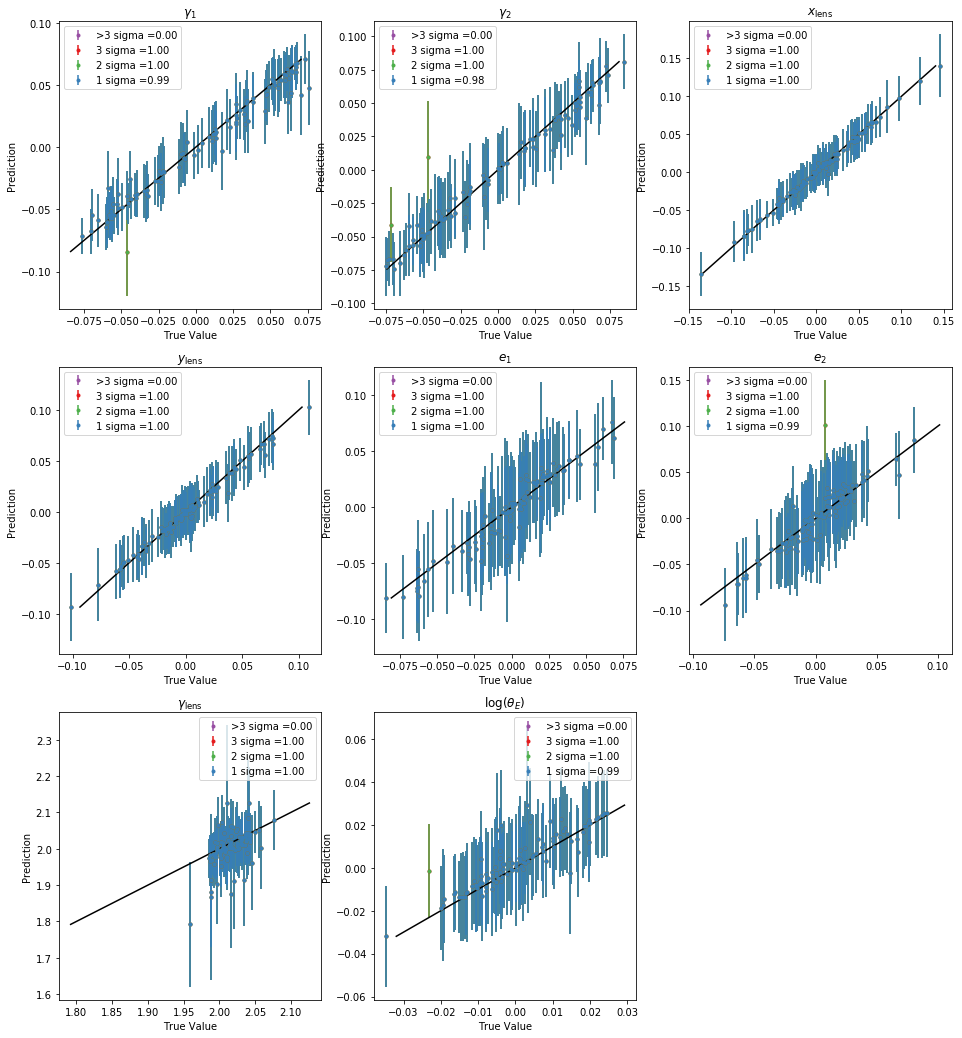

In [37]:
bnn_infer.gen_coverage_plots(num_lenses=num_lenses)

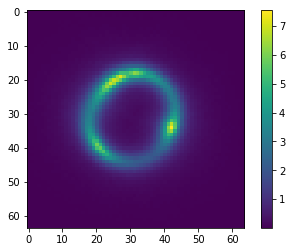

external_shear_g1 -0.024464741
external_shear_g2 -0.06305966
lens_mass_center_x -0.028625775
lens_mass_center_y -0.051288143
lens_mass_e1 0.009173115
lens_mass_e2 -0.01449502
lens_mass_gamma 2.0252705
lens_mass_theta_E_log -0.0010174897


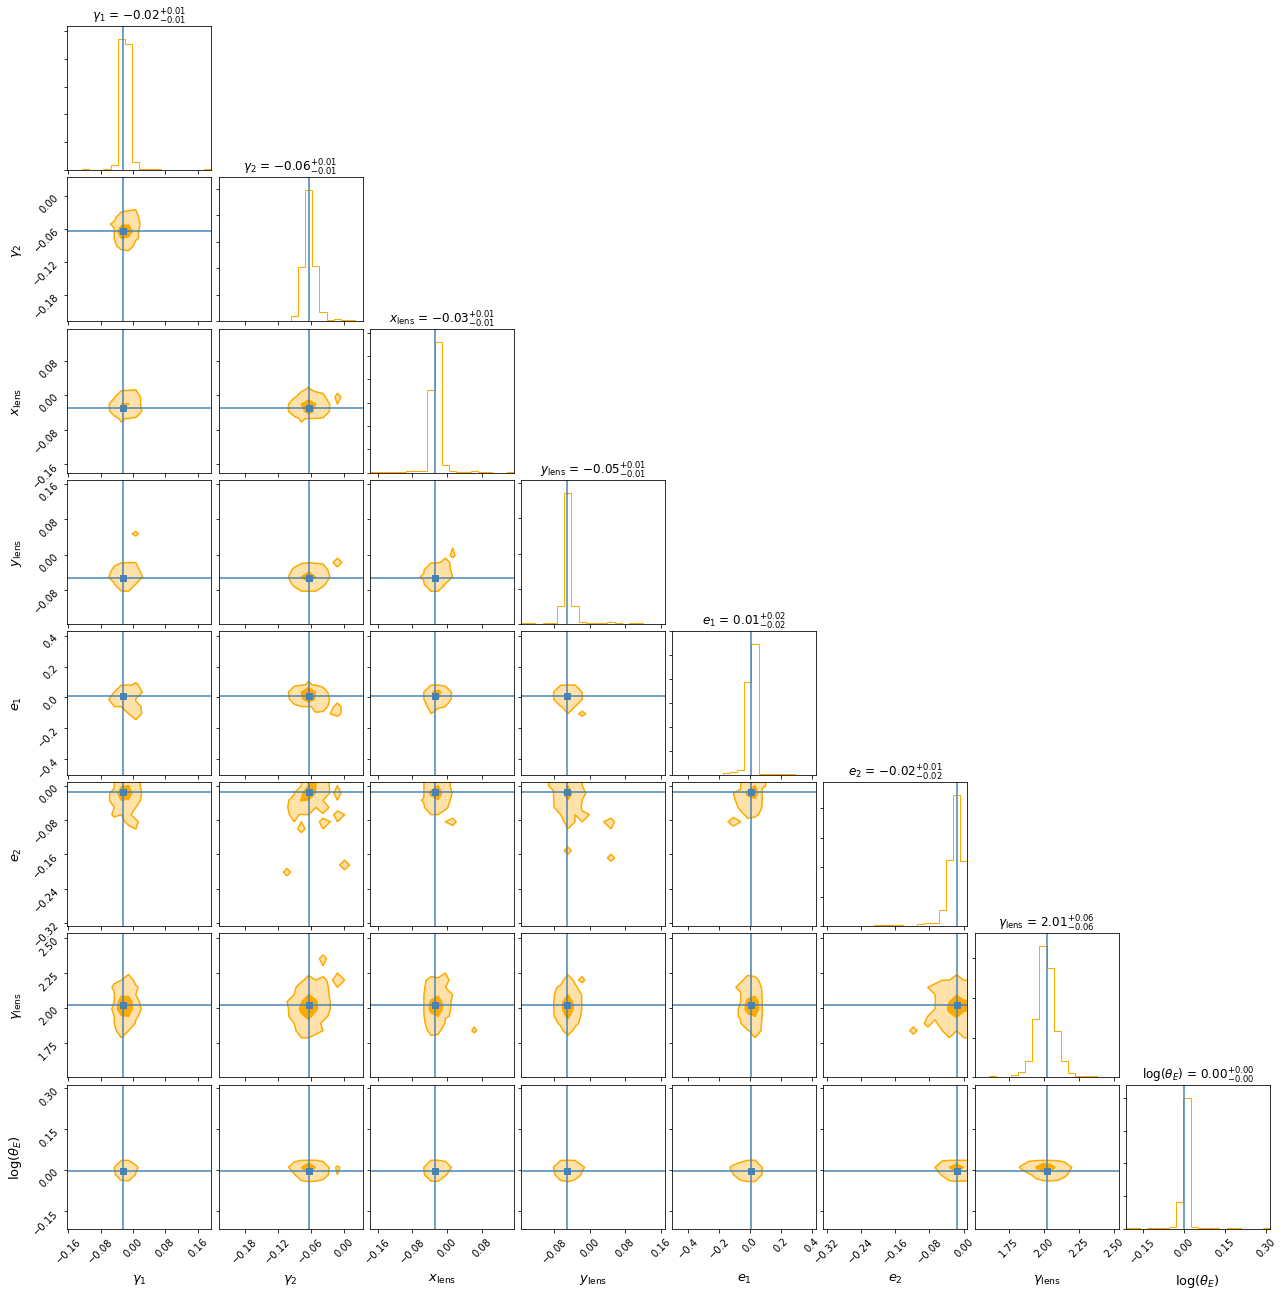

In [38]:
image_index = 20
bnn_infer.plot_posterior_contours(image_index)

6.248739923190948e-06 0.004080086399661589


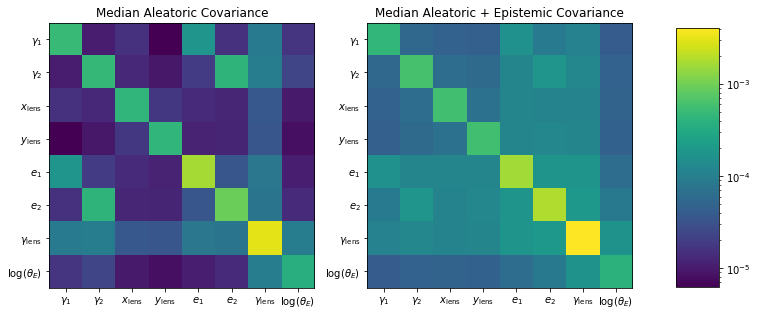

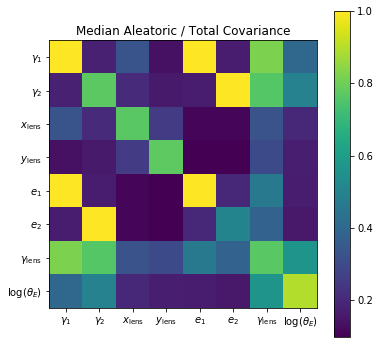

In [39]:
bnn_infer.comp_al_ep_unc()

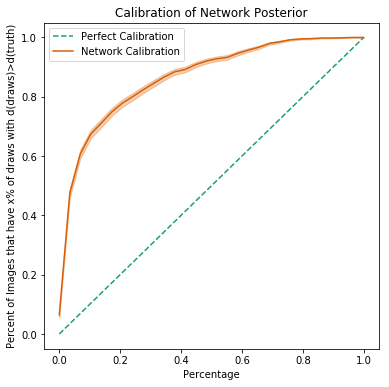

In [40]:
color_map = ['#1b9e77','#d95f02','#7570b3','#e7298a','#66a61e']
n_perc_points = 30
fig = bnn_infer.plot_calibration(color_map=color_map,n_perc_points=n_perc_points,show_plot=False)

## GM Posterior

In [41]:
# First specify the config path
root_path = '/Users/sebwagner/Documents/Grad_School/Rotations/Phil/ovejero/'
config_path = root_path + 'configs/nn3.json'

# Check that the config has what you need
cfg = model_trainer.load_config(config_path)
recursive_str_checker(cfg)

# The InferenceClass will do all the heavy lifting of preparing the model from the configuration file,
# initializing the validation dataset, and providing outputs correctly marginalized over the BNN uncertainties.
bnn_infer = bnn_inference.InferenceClass(cfg)

# Now we just have to ask the InferenceClass to spin up some samples from our BNN. The more samples, the more
# accurate our plots and metrics will be. The right value to use unfortunately requires a bit of trial and error.
# 100 is a good starting point though.
num_samples = 1000
save_path_nn3 = root_path + 'hierarchical_results/nn3_samps/'
bnn_infer.gen_samples(num_samples,save_path_nn3)

Is model built: True
Loaded weights /Users/sebwagner/Documents/Grad_School/Rotations/Phil/ovejero/models/nn3.h5
Loading samples from /Users/sebwagner/Documents/Grad_School/Rotations/Phil/ovejero/hierarchical_results/nn3_samps/


In [42]:
bnn_infer.report_stats()

Parameter, Median Abs Error, Median Std
external_shear_g1 0.0034739725270036157 0.024352203988260848
external_shear_g2 0.0034823268162577324 0.026910163028788552
lens_mass_center_x 0.0026040944197090214 0.025904183364935718
lens_mass_center_y 0.0027301829130211355 0.02575877680407972
lens_mass_e1 0.006738744824959415 0.04572508612918655
lens_mass_e2 0.006908477189579418 0.04671419311048923
lens_mass_gamma 0.013138646358257677 0.06661510534080871
lens_mass_theta_E_log 0.0022005794901438724 0.022216004616424


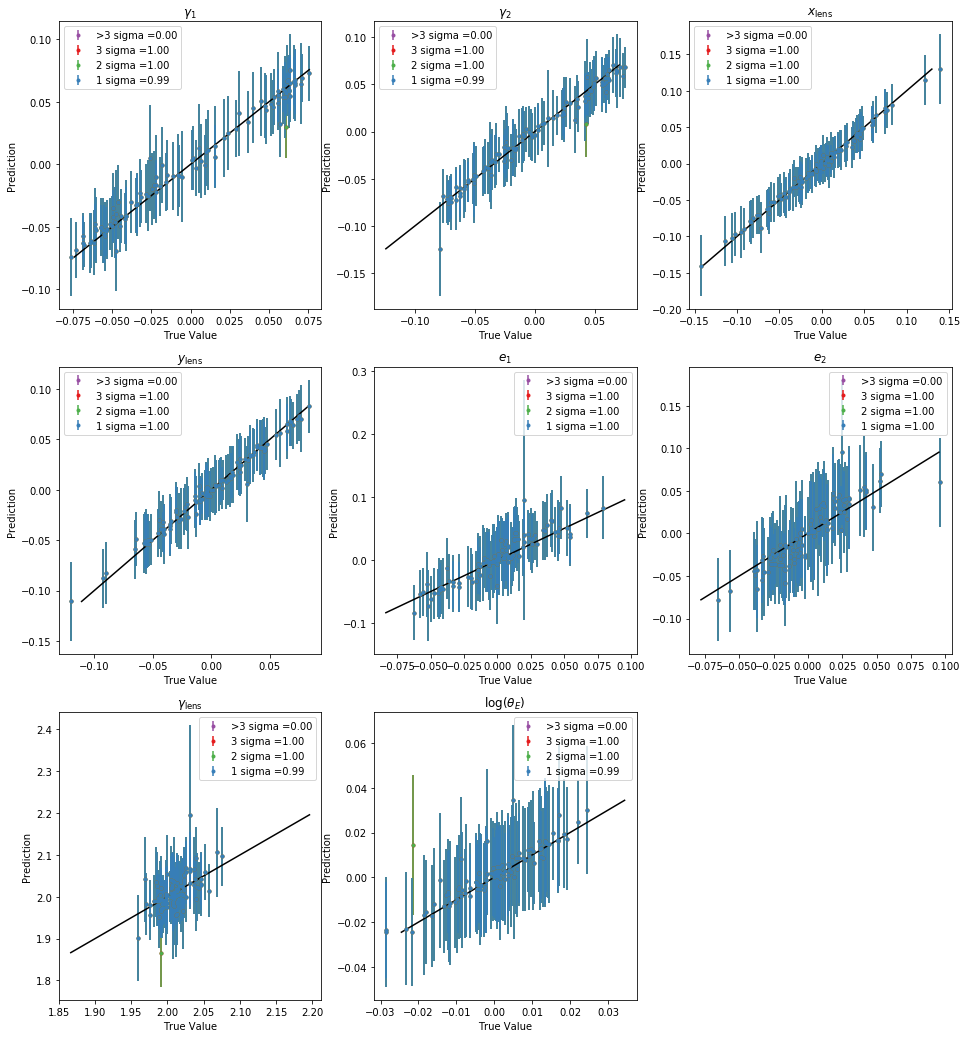

In [43]:
bnn_infer.gen_coverage_plots(num_lenses=num_lenses)

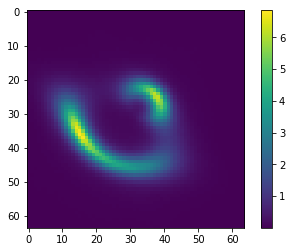

external_shear_g1 0.06270528
external_shear_g2 0.015224149
lens_mass_center_x -0.051460855
lens_mass_center_y -0.090225935
lens_mass_e1 0.009807641
lens_mass_e2 -0.010379399
lens_mass_gamma 1.9973375
lens_mass_theta_E_log 0.0009454201


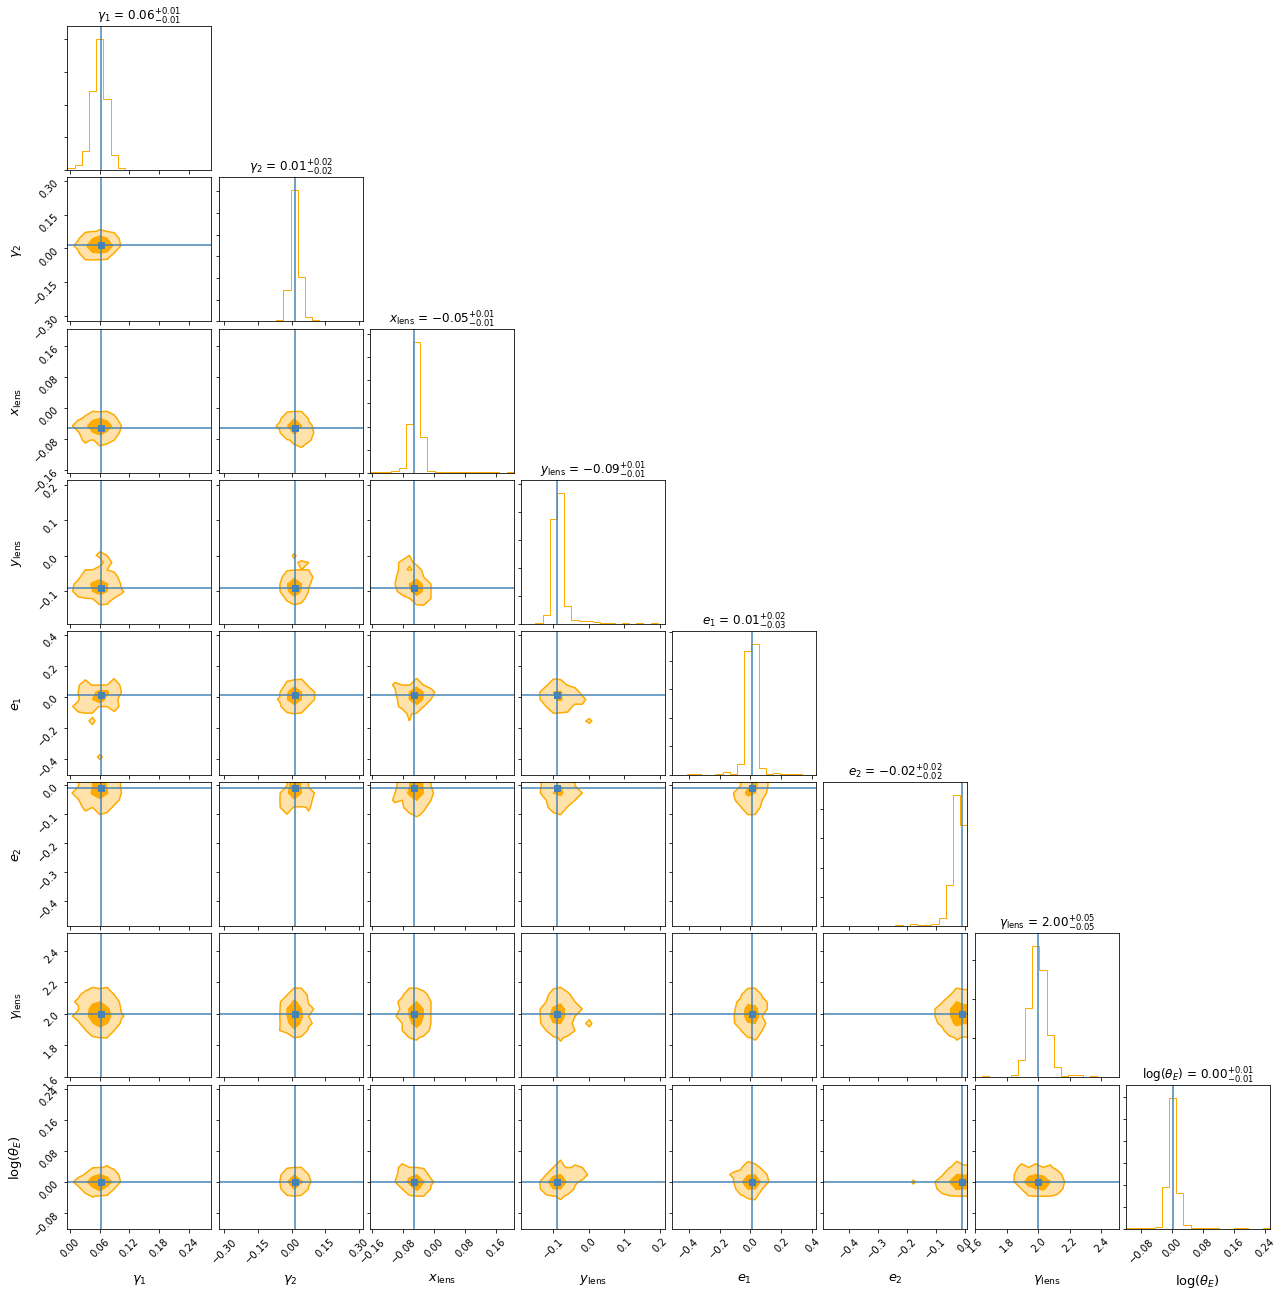

In [44]:
image_index = 20
bnn_infer.plot_posterior_contours(image_index)

6.326279863293832e-06 0.004500689974419618


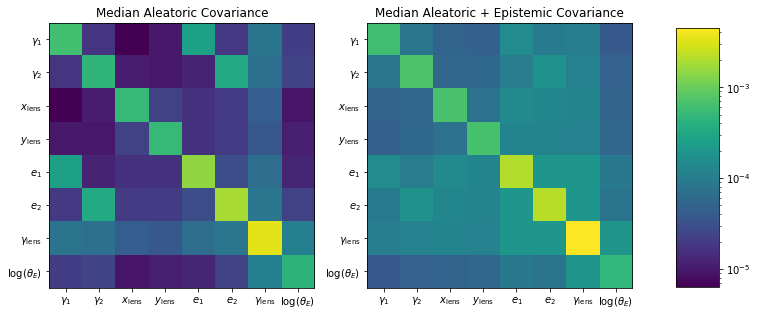

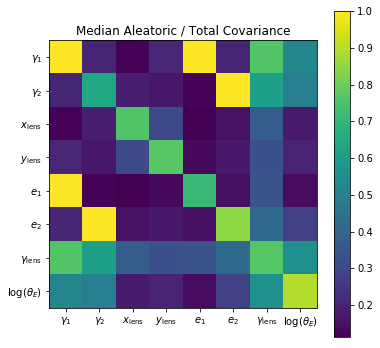

In [45]:
bnn_infer.comp_al_ep_unc()

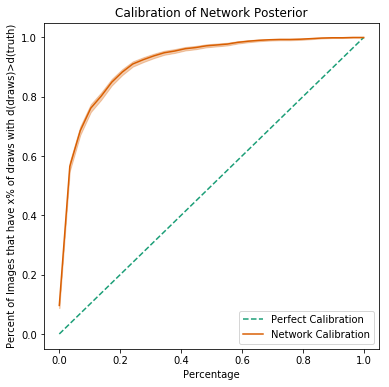

In [46]:
color_map = ['#1b9e77','#d95f02','#7570b3','#e7298a','#66a61e']
n_perc_points = 30
fig = bnn_infer.plot_calibration(color_map=color_map,n_perc_points=n_perc_points,show_plot=False)

## Combined Plot

Is model built: True
Loaded weights /Users/sebwagner/Documents/Grad_School/Rotations/Phil/ovejero/models/nn1.h5
Loading samples from /Users/sebwagner/Documents/Grad_School/Rotations/Phil/ovejero/hierarchical_results/nn1_samps/
Is model built: True
Loaded weights /Users/sebwagner/Documents/Grad_School/Rotations/Phil/ovejero/models/nn2.h5
Loading samples from /Users/sebwagner/Documents/Grad_School/Rotations/Phil/ovejero/hierarchical_results/nn2_samps/
Is model built: True
Loaded weights /Users/sebwagner/Documents/Grad_School/Rotations/Phil/ovejero/models/nn3.h5
Loading samples from /Users/sebwagner/Documents/Grad_School/Rotations/Phil/ovejero/hierarchical_results/nn3_samps/


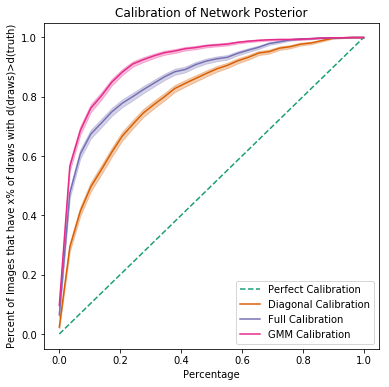

In [47]:
# First specify the config path
config_path = root_path + 'configs/nn1.json'

# Check that the config has what you need
cfg = model_trainer.load_config(config_path)
recursive_str_checker(cfg)

# The InferenceClass will do all the heavy lifting of preparing the model from the configuration file,
# initializing the validation dataset, and providing outputs correctly marginalized over the BNN uncertainties.
bnn_infer = bnn_inference.InferenceClass(cfg)

# Now we just have to ask the InferenceClass to spin up some samples from our BNN. The more samples, the more
# accurate our plots and metrics will be. The right value to use unfortunately requires a bit of trial and error.
# 100 is a good starting point though.
num_samples = 1000
bnn_infer.gen_samples(num_samples,save_path_nn1)

color_map = ['#1b9e77','#d95f02','#7570b3','#e7298a','#66a61e']
n_perc_points = 30
fig = bnn_infer.plot_calibration(color_map=color_map,n_perc_points=n_perc_points,show_plot=False)

# NN2
config_path = root_path + 'configs/nn2.json'
cfg = model_trainer.load_config(config_path)
recursive_str_checker(cfg)
bnn_infer = bnn_inference.InferenceClass(cfg)
bnn_infer.gen_samples(num_samples,save_path_nn2)
fig = bnn_infer.plot_calibration(color_map=color_map[1:],n_perc_points=n_perc_points,figure=fig,show_plot=False)

# NN3
config_path = root_path + 'configs/nn3.json'
cfg = model_trainer.load_config(config_path)
recursive_str_checker(cfg)
bnn_infer = bnn_inference.InferenceClass(cfg)
bnn_infer.gen_samples(num_samples,save_path_nn3)
fig = bnn_infer.plot_calibration(color_map=color_map[2:],n_perc_points=n_perc_points,figure=fig,show_plot=True,
                                legend=['Perfect Calibration','Diagonal Calibration','Full Calibration',
                                       'GMM Calibration'])